In [55]:
import pandas as pd               # pandas: 데이터 조작 및 분석을 위한 라이브러리 (주로 표 형태의 데이터를 다루는 DataFrame 사용)
from sklearn.model_selection import train_test_split  # model_selection: 데이터를 훈련용과 테스트용으로 나누는 기능을 제공
from sklearn.tree import DecisionTreeClassifier       # tree: 의사결정나무 모델을 제공
from sklearn.ensemble import RandomForestClassifier   # ensemble: 여러 모델을 결합하는 앙상블 기법 (랜덤 포레스트 등)을 제공
from sklearn.linear_model import LogisticRegression   # linear_model: 선형 모델 (로지스틱 회귀 등)을 제공
from sklearn.metrics import accuracy_score            # metrics: 모델의 성능을 평가하는 다양한 지표 (정확도 등)를 제공
from sklearn.neighbors import KNeighborsClassifier    # neighbors: K-최근접 이웃(KNN) 모델을 제공
from sklearn.preprocessing import StandardScaler      # preprocessing: 데이터 전처리(스케일링 등)를 위한 기능을 제공


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/winequality-white.csv', sep=';').dropna();

df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [56]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [57]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [69]:
import numpy as np
from tensorflow.keras import layers, models

X = df.drop(columns=["quality"])

y = df["quality"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [71]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3), # ???
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"), # <- 레이어 추가
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [73]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3479 - loss: 1.5580 - val_accuracy: 0.5204 - val_loss: 1.1505
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5331 - loss: 1.1210 - val_accuracy: 0.5421 - val_loss: 1.0949
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5135 - loss: 1.1114 - val_accuracy: 0.5281 - val_loss: 1.0712
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5521 - loss: 1.0722 - val_accuracy: 0.5548 - val_loss: 1.0550
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5534 - loss: 1.0710 - val_accuracy: 0.5651 - val_loss: 1.0336
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5538 - loss: 1.0572 - val_accuracy: 0.5587 - val_loss: 1.0340
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5676 - loss: 1.0219 - val_accuracy: 0.5497 - val_loss: 1.0360
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5566 - loss: 1.0509 - val_accuracy: 0.

In [74]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [75]:
# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [76]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


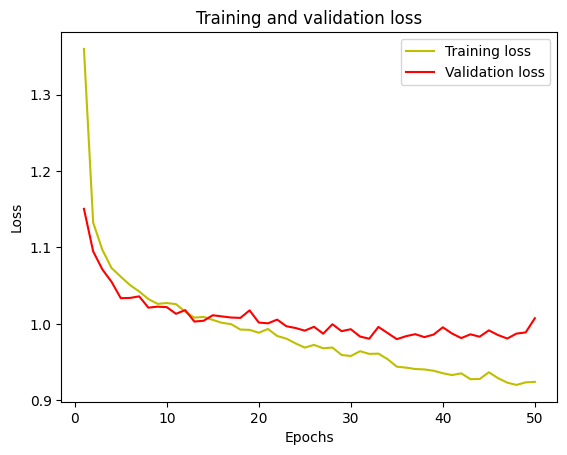

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

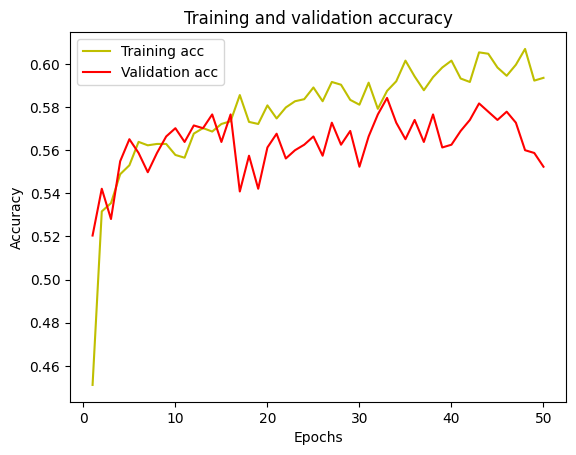

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.06      0.11        51
           2       0.57      0.66      0.61       295
           3       0.52      0.58      0.55       409
           4       0.46      0.44      0.45       183
           5       0.00      0.00      0.00        33

    accuracy                           0.53       980
   macro avg       0.42      0.29      0.29       980
weighted avg       0.53      0.53      0.50       980

[[  0   0   7   2   0   0]
 [  0   3  36  11   1   0]
 [  0   0 195  92   8   0]
 [  0   0  99 238  72   0]
 [  0   0   7  95  81   0]
 [  0   0   0  18  15   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
